In [1]:
import os
import sys
import json
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras import backend as K

BASE_PATH = '/Users/lorenzofederici/Univpm/Tesi/LUS-multitask-learning/'
if BASE_PATH not in sys.path:
    sys.path.append(BASE_PATH)

from experiment import Experiment
from utils.dataset import DatasetHandler

exps_path = BASE_PATH + 'config/experiments.json'
with open(exps_path) as f:
    configs = json.load(f)

gpu = len(tf.config.list_physical_devices('GPU'))>0
if gpu:
    tf.config.set_visible_devices([tf.config.list_physical_devices('GPU')[0],tf.config.list_physical_devices('CPU')[0]])
    tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[0], True)
    print("---> GPU is available <---")
else:
    print("---> GPU NOT available <---")

Using TensorFlow backend


/Users/lorenzofederici/Univpm/Tesi/LUS-multitask-learning/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


---> GPU is available <---


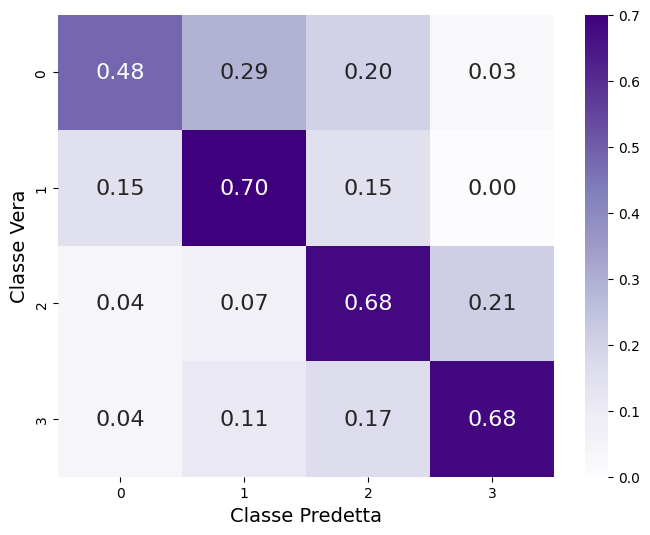

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(percentages):
    # Definisci le etichette delle classi
    classes = ["0", "1", "2", "3"]
    
    # Crea la matrice di confusione
    cm = np.array(percentages).reshape(4, 4)
    
    # Normalizza la matrice di confusione per avere valori tra 0 e 1
    cm = cm / cm.sum(axis=1)[:, np.newaxis]
    
     # Crea il plot della matrice di confusione
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap="Purples", xticklabels=classes, yticklabels=classes, fmt=".2f", annot_kws={"fontsize":16})
    plt.xlabel('Classe Predetta', fontsize=14)
    plt.ylabel('Classe Vera', fontsize=14)

    # Aumenta il font delle etichette delle classi
    heatmap.tick_params(axis='both', which='major', labelsize=12)

    
    plt.show()

# Esempio di percentuali di predizione
percentages = [0.48, 0.29, 0.20, 0.03,
               0.15, 0.70, 0.15, 0.00,
               0.04, 0.07, 0.68, 0.21,
               0.04, 0.11, 0.17, 0.69]

plot_confusion_matrix(percentages)


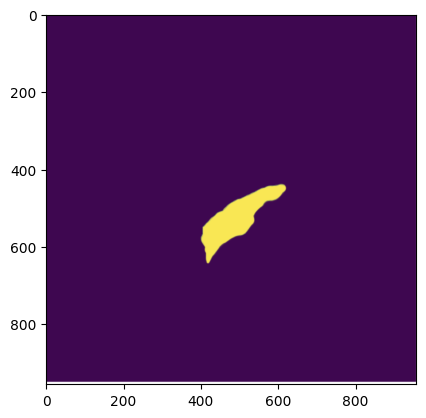

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


# Sostituisci "immagine.png" con il nome del file
immagine = Image.open("/Users/lorenzofederici/Univpm/Tesi/LUS-multitask-learning/img.png")

# Convertire l'immagine in una matrice NumPy
matrice_immagine = np.array(immagine)

plt.imshow(matrice_immagine, cmap="gray")
plt.show()

In [19]:
matrice_immagine[0,6,3]

255

In [20]:
# Definire i valori RGB per il viola e il giallo
viola = 255
giallo = (255, 255, 0)

# Creare una matrice vuota per memorizzare i valori binari
matrice_binaria = np.zeros((matrice_immagine.shape[0], matrice_immagine.shape[1]))

# Iterare su ogni pixel dell'immagine
for i in range(matrice_immagine.shape[0]):
    for j in range(matrice_immagine.shape[1]):
        # Se il pixel è viola, impostare il valore a 0
        # if np.array_equal(matrice_immagine[i, j, 3], viola):
        if matrice_immagine[i, j, 3] == viola:
            matrice_binaria[i, j] = 0
        # Se il pixel è giallo, impostare il valore a 1
        else:
            matrice_binaria[i, j] = 1

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


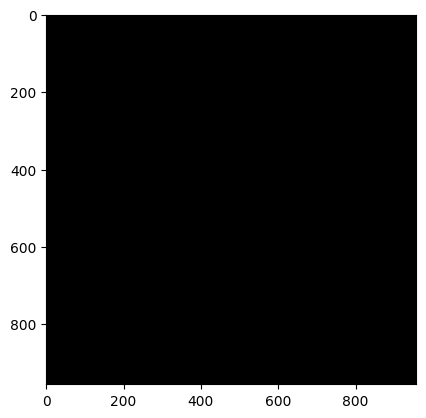

In [21]:
# Stampare la matrice binaria
print(matrice_binaria)

# Visualizzare la matrice binaria come un'immagine
plt.imshow(matrice_binaria, cmap="gray")
plt.show()

# TEST 

tf.Tensor([0. 0. 1. 0.], shape=(4,), dtype=float32)


2024-02-11 01:37:54.319388: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-02-11 01:37:54.319415: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-02-11 01:37:54.319420: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-02-11 01:37:54.319464: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-11 01:37:54.319486: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


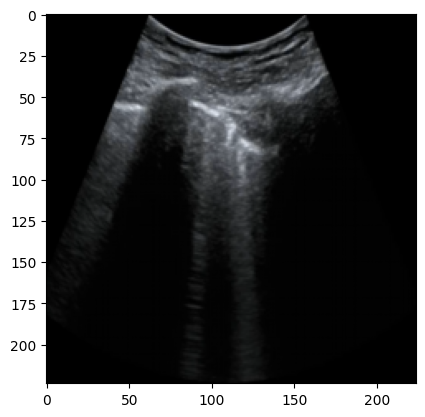

In [2]:
import pickle
with open('/Users/lorenzofederici/Univpm/Tesi/LUS-multitask-learning/dataset/test/test_3.pickle', 'rb') as file:
    img, [lbl, mask] = pickle.load(file)

plt.imshow(img)

print(lbl)


In [3]:
def find_highest_accuracy_csv(folder_path):
    max_accuracy = 0
    max_accuracy_file = None

    for file in os.listdir(folder_path):
        if file.endswith('.csv'):
            try:
                file_path = os.path.join(folder_path, file)
                df = pd.read_csv(file_path, delimiter=';')

                str_val = df['cls_label_accuracy'].values[0]
                str_val = str_val.replace(',', '.')
                int_val = float(str_val)
                current_max = int_val
                
                if current_max > max_accuracy:
                    max_accuracy = current_max
                    max_accuracy_file = file
            except Exception as e:
                print(f"Error processing file {file}: {e}")
    return max_accuracy_file, max_accuracy


In [4]:
def find_highest_accuracy_csv(folder_path):
    top_accuracies = []

    for file in os.listdir(folder_path):
        if file.endswith('.csv'):
            try:
                file_path = os.path.join(folder_path, file)
                df = pd.read_csv(file_path, delimiter=';')

                # Prendi il valore, sostituisci la virgola con un punto e convertilo in float
                #str_val = df['seg_mask_dice_coef'].values[0]
                str_val = df['cls_label_accuracy'].values[0]
                #str_val = df['dice_coef'].values[0]
                str_val = str_val.replace(',', '.')
                accuracy_val = float(str_val)

                # Aggiungi il file e il suo valore massimo alla lista
                top_accuracies.append((file, accuracy_val))

            except Exception as e:
                print(f"Error processing file {file}: {e}")

    # Ordina la lista in base al valore massimo e tieni solo i primi tre elementi
    top_accuracies.sort(key=lambda x: x[1], reverse=True)
    top_three_accuracies = top_accuracies[:3]

    return top_three_accuracies

In [5]:
# folder_path = "/Users/lorenzofederici/Univpm/Tesi/Risultati/LAST/resnet18-multi/lr0001/eval_result"
folder_path = "/Users/lorenzofederici/Univpm/Tesi/Risultati/LAST/mul50/eval_result/50pp"

top_files = find_highest_accuracy_csv(folder_path)
for file, acc in top_files:
    print("-"*10)
    print(f"1) File: {file}")
    print(f" Accuracy: {acc}")
print("-"*10)


# ----------
# 1) File: 48-exp_multitask_resnet50pp_imagenet_BS16_EP30_OPTAdam_LR0.001_AUGTrue_DO0.3_DIL1.csv
#  Accuracy: 0.5016379356384277
# ----------
# 1) File: 46-exp_multitask_resnet50pp_imagenet_BS16_EP30_OPTAdam_LR0.001_AUGTrue_DO0.1_DIL1.csv
#  Accuracy: 0.4811975061893463
# ----------
# 1) File: 27-exp_multitask_resnet50pp_BS16_EP30_OPTAdam_LR0.001_AUGTrue_DO0.0_DIL1.csv
#  Accuracy: 0.47066986560821533
# ----------

----------
1) File: 38-exp_multitask_resnet50pp_BS16_EP30_OPTAdam_LR0.001_AUGTrue_DO0.2_DIL1.csv
 Accuracy: 0.6305609345436096
----------
1) File: 27-exp_multitask_resnet50pp_BS16_EP30_OPTAdam_LR0.001_AUGTrue_DO0.0_DIL1.csv
 Accuracy: 0.613152801990509
----------
1) File: 46-exp_multitask_resnet50pp_imagenet_BS16_EP30_OPTAdam_LR0.001_AUGTrue_DO0.1_DIL1.csv
 Accuracy: 0.603481650352478
----------


# OLD

In [7]:
experiment = Experiment(BASE_PATH, 'multi', output_mode= (False,True))

In [8]:
# ============================ Settings ============================
idx = 0
configs_general = configs['SETTING']
configs_exps    = configs['EXPS'][idx]

for i,config in enumerate(configs_exps):
    experiment.build(configs_general, config, i+1)

print('>>Setting: ', configs_general)
print('>>Experiment: ', configs_exps)

experiment.split_dataset()
experiment.generate_split_charts()



------------------------------------------------------------------------------------------
>> EXPERIMENT 1: exp_multitask_resnet50_BS16_EP50_OPTAdam_LR0.001_AUGTrue_DO0.2_DIL1 <<
------------------------------------------------------------------------------------------
>> Dataset for multitask Loaded
>>Setting:  {'IMG_SHAPE': 224, 'N_CLASS': 4, 'SEED': 24}
>>Experiment:  [{'backbone': 'resnet50', 'task': 'multitask', 'out_class_cls': 4, 'batch_size': 16, 'epoch': 50, 'split_ratio': [0.6, 0.2, 0.2], 'optimizer': 'Adam', 'lr': 0.001, 'augmentation': True, 'dropout': 0.2}]
>> Dataset Splitted
>> Class Weights Computed
>> Split Charts Generated


In [ ]:
# from utils.dataview import *
# for i in ['val', 'test']:
#     print(i, '-'*70)
#     plot_set_batches(experiment, set=i, num_batches=40)

In [ ]:
model = experiment.build_model()
model = experiment.compile_model(model)
# model.summary()
# h = experiment.train_model(model)

In [ ]:
h = experiment.train_model(model)

In [ ]:
batch_size = experiment.exp_config['batch_size']    
test_steps = -(-experiment.dataset.frame_counts['test'] // batch_size)


# PREDICT & CONFUSION_MTRX
y_pred = model.predict(
    experiment.x_test,
    batch_size = batch_size,
    steps      = test_steps,
    workers    = 1,
    use_multiprocessing = False
)